<a href="https://colab.research.google.com/github/Gabriel-dev-bot/Emptech-2/blob/main/Hands_on_Activity_4_1_Advanced_Data_Analytics_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
Summer Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 3.1**</u> | <u>**Data Analysis**</u>
**Name** | Pabilan, Gabriel
**Section** | CPE31S1
**Date Performed**: |14/06/2024
**Date Submitted**: |14/06/2024
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>


Lab - Decision Tree Classification
Objectives
In this lab, you will use a decision tree classifier model to determine who survived the Titanic cruise ship disaster.

**Part 1: Create a Decision Tree Classifier**

**Part 2: Apply the Decison Tree Model**

**Part 3: Evaluate the Decison Tree Model**

Scenario / Background
In this lab you will create a decision tree classifier that will work with a data set which contains the details about
the more than 1300 hundred passengers who were onboard the passenger liner Titanic on its infamous maiden
voyage.
Required Resources

* 1 PC with Internet access

* Python libraries: pandas, sklearn, and IPython.display
* Additonal application: Graphviz
* Datafiles: titanic-train.csv, titanic-test.csv, titanic_all.csv



In [56]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#datasets
titanic_test = pd.read_csv("titanic_test.csv")
titanic_train = pd.read_csv("titanic_train.csv")

In [57]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


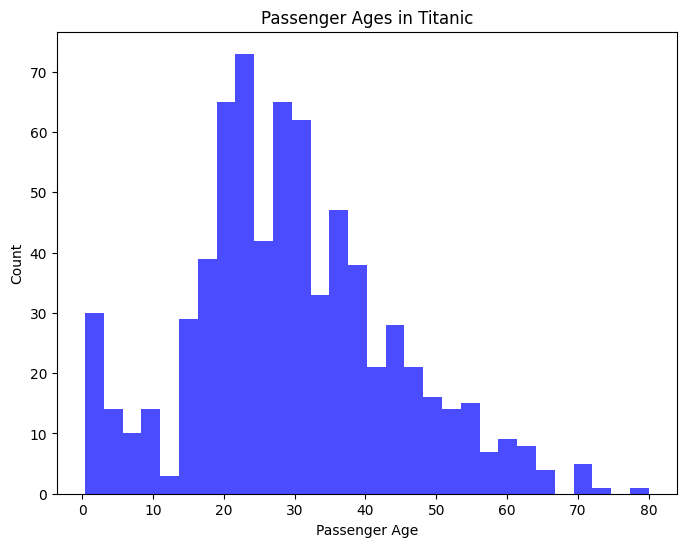

<ipython-input-58-9c8e4195c384>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titanic_train['Pclass'].value_counts().index, y=titanic_train['Pclass'].value_counts().values, palette='viridis')


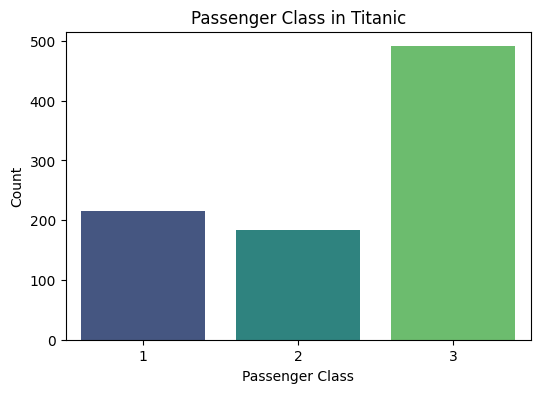

<ipython-input-58-9c8e4195c384>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titanic_train['Survived'].value_counts().index, y=titanic_train['Survived'].value_counts().values, palette='Set1')


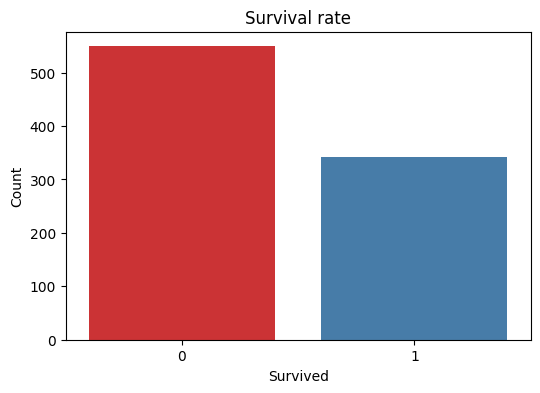

In [58]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Passenger ages in Titanic
plt.figure(figsize=(8, 6))
plt.hist(titanic_train['Age'].dropna(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Passenger Age')
plt.ylabel('Count')
plt.title('Passenger Ages in Titanic')
plt.show()

# Passenger class in Titanic
plt.figure(figsize=(6, 4))
sns.barplot(x=titanic_train['Pclass'].value_counts().index, y=titanic_train['Pclass'].value_counts().values, palette='viridis')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class in Titanic')
plt.show()

# Survival rate
plt.figure(figsize=(6, 4))
sns.barplot(x=titanic_train['Survived'].value_counts().index, y=titanic_train['Survived'].value_counts().values, palette='Set1')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival rate')
plt.show()

In [59]:
# Select columns 'Age' and 'Fare' and drop rows with missing values
AgeFare = titanic_train.loc[titanic_train[['Age', 'Fare']].notna().all(axis=1), ['Age', 'Fare']]

# Separate the two variables
X, y = AgeFare[['Age']], AgeFare['Fare']

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(AgeFare.drop('Fare', axis=1), AgeFare['Fare'], test_size=0.2, random_state=42)

lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse_val = mean_squared_error(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_val:.2f}")
print(f"R-squared: {r2_val:.2f}")

Mean Squared Error: 4147.43
R-squared: 0.00


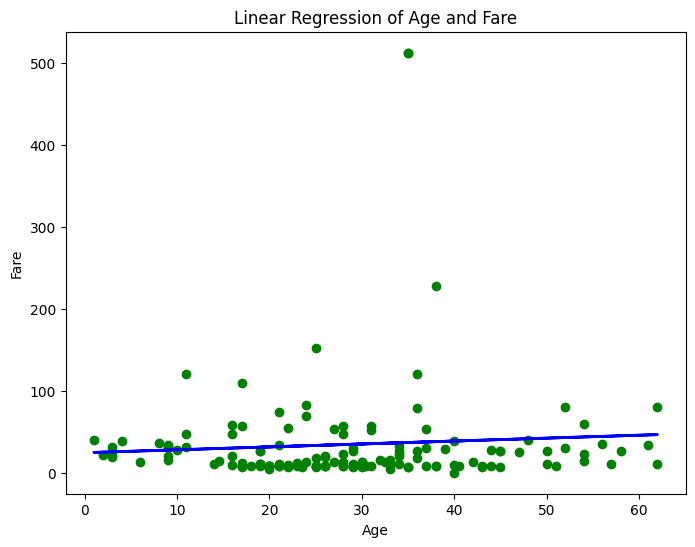

In [62]:
 # linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.title('Linear Regression of Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Part 1: Create a Decision Tree Classifier
In this part of the lab, you will create a decision tree classifier that will learn from a labelled dataset.
The dataset contains the names and demographic details for each passenger. In addition, details of the
passengers' trip are included. From this data, we can be build a decision tree that illustrates the factors that
contributed to survivability, or lack of it, for the voyage.
The datasets contain the following variables:

Variable Description
1. PassengerID Unique identifier for each passenger
2. Survival Did the passenger survive? (0 = No; 1 = Yes)
3. Pclass Passenger ticket class. (1 = 1st; 2 = 2nd; 3 = 3rd)
4. Name Name of the passenger. (last name, first name)
5. Gender Male or female
6. Age Age in years. Mostly integers with float values for children under one year.
7. SibSp Number of siblings or spouse onboard.
8. Parch Number of parents or children onboard.
9. Ticket Ticket number
10. Fare Amount paid for fare in pre-1970 British Pounds
11. Cabin Cabin number
12. Embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


With the data above, what kinds of questions can we ask about the factors that contributed to passengers
surviving or perishing in the Titanic disaster?

Step 1: Create the dataframe
a) Import pandas and the csv file
First, import pandas and create a dataframe from the Titanic training data set, which is stored in the titanic-
train.csv file. Use the pd.read_csv() method.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
training = pd.read_csv("titanic_train.csv")


b) Verify the import and take a look at the data.

In [64]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Are there missing values in the data set?
Yes there are missing values in the dataset,the missing values are age and at the beginning column

In [65]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Prepare the Data for the Decision Tree Model.

a) Replace string data with numeric labels

We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handle
numeric data. The values for the Gender variable must be transformed into numeric representations. 0 will be
used to represent "male" and 1 will represent "female."
In this code, a lambda expression is used with the apply() dataframe method. This lambda expression
represents a function that uses a conditional statement to replace the text values in the columns with the
appropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',
return 0, if the value is something else, return 1." The apply() method will execute this function on the values in
every row of the "Gender" column of the dataframe.

In [66]:
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

b) Verify that the Gender variable has been changed.
The output should show values of 0 or 1 for the Gender variable in the dataset.

In [67]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


c) Address Missing Values in the Dataset

The output of the info() method above indicated that about 180 observations are missing the age value. The age
value is important to our analysis. We must address these missing values in some way. While not ideal, we can
replace these missing age values with the mean of the ages for the entire dataset.
This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method will
change the original dataframe by using the inplace = True argument.

In [68]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

d) Verify that the values have been replaced.

In [69]:
num_missing_age = training["Age"].isna() .sum()
print("Number of missing Age:", num_missing_age)

Number of missing Age: 0


What is the value that was used to replace the missing ages?
There is no missing age the result is 0

Step 3: Train and Score the Decision Tree Model.

a) Create an array object with the variable that will be the target for the model.
The purpose of the model is to classify passengers as survivors or victims. The dataset identifies survivors and
victims. The model will learn which input variable values are most likely to belong to victims and survivors, and
then use that information to classify passengers from a unique test data set.

In [70]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

b) Create an array of the values that will be the input for the model.

Only some of the features of the data are useful for creating the classifier tree. We create a list of the columns
from the data that we want the classifier to use as the input variables and then create an array using the column
name from that variable. The variable X_input holds the values for all the features that the model will use to
learn how to make the classifications. After the model is trained, we will use this variable to assign these labels
to the test data set.


In [71]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

c) Create the learned model.
Import the decision tree module from the sklearn machine learning library. Create the classifier object
clf_train. Then, use the fit() method of the classifier object, with the X_input and y_target variables as
parameters, to train the model.

In [72]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

d) Evaluate the model
Use the score() method of the decision tree object to display the percentage accuracy of the assignments
made by the classifier. It takes the input and target variables as arguments.

In [73]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

Step 6: Visualize the Tree
a) Create the intermediate file output

Import the sklearn.externals.six StringIO module which is used to output the characteristics of the
decision tree to a file. We will create a Graphviz dot file which will allow us to export the results of the classifier
into a format that can be converted into a graphic.


In [74]:
#code cell 12
from sklearn.tree import export_graphviz
with open("/content/titanic_test.csv", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

b) Install Graphviz
To visualize the decision tree, Graphviz needs to be installed from a terminal. The installation requires that a
prompt be answered, which can't be done from a notebook code cell. Use the apt-get install graphviz
command from the terminal command line to install this software.

c) Convert the intermediate file to a graphic
The dot file that was created above can be converted to a .png file with the graphiz dot renderer. This is a shell
command, so use ! before it to run it from this noteblook. The new titanic.png graphic file should appear in the
directory that contains this notebook.

In [75]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng /content/titanic_test.csv -o /content/titanic.png

d) Display the image
Now we will import the Image module from the IPython.display library. This will allow us to open and display
an external graphics file on the notebook page. The Image function is used to display the file, with the .png file
name as argument.

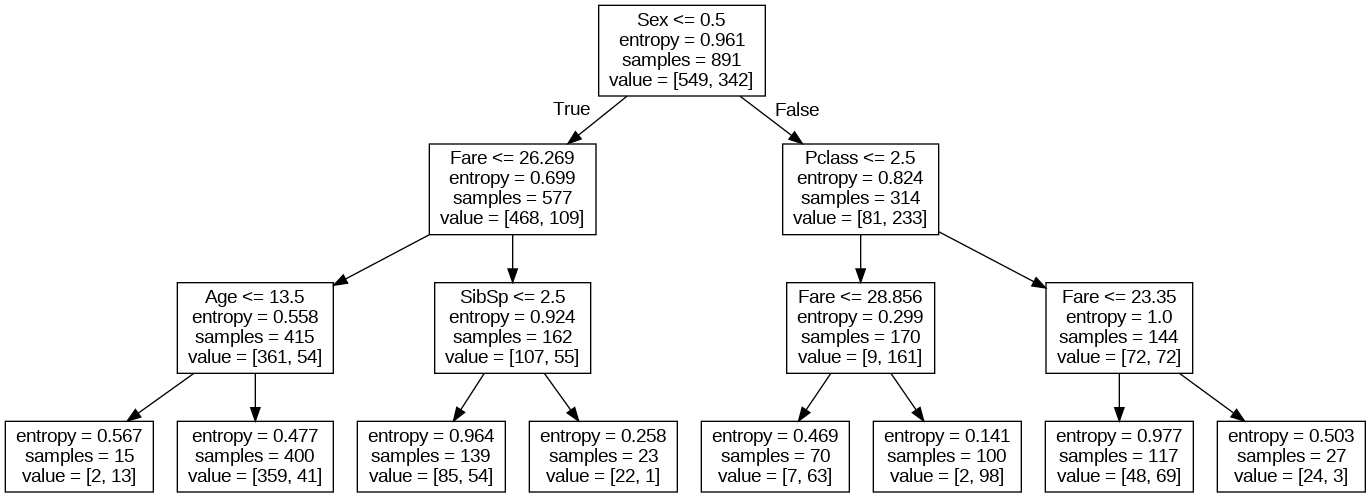

In [76]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("/content/titanic.png")

e) Interpret the tree
From the tree, we can see several things. First, at the root of the tree is the Gender variable, indicating that it is
the single most important factor in making the classification. The branches to the left are for Gender = 0 or male.
Each root and intermediate node contains the decision factor, the entropy, and the number of passengers who fit
the critierion at that point in the tree. For example, the root node indicates that there are 891 observations that
make up the learning data set. At the next level, we can see that 577 people were male, and 314 were female. In
the third level, at the far right, we can see that 415 people were male and paid a fare of less than 26.2686.
Finally, the leaf nodes for that intermediate node indicate that 15 of these passengers were below the age of
13.5, and the other 400 were older than that age.
Finally, the elements in the value array indicate survival. The first value is the number of people who died, and
the second is the number of survivors for each criterion. The root node tells us that out of our sample, 549
people died and 342 survived.
Entropy is a measure of noise in the decision. Noise can be viewed as uncertainty. For example, in nodes in
which the decision results in equal values in the survival value array, the entropy is at its highest possible value,
which is 1.0. This means that the model was unable to definitively make the classification decision based on the
input variables. For values of very low entropy, the decision was much more clear cut, and the difference in the
number of survivors and victims is much higher.

What describes the group that had the most deaths by number? Which group had the most survivors?

Part 2: Apply the Decision Tree Model

In this part of the lab, we will use the results of the learned decision tree model to label an unlabelled dataset of
Titanic passengers. The decision tree will evaluate the features of each observation and label the observation as
survived (label = 1) or died (label = 0).

Step 1: Import and Prepare the Data
In this step, you will import and prepare the data for analysis.

a) Import the data.
Name the dataframe "testing" and import the file titanic-test.csv.


In [78]:
#code cell 15
#import the file into the 'testing' dataframe.
import pandas
import pandas as pd


testing = pd.read_csv("/content/titanic_test.csv")

How many records are in the data set?


In [79]:
records = testing.shape[0]
print("Records in the dataset:", records)

Records in the dataset: 418


Which important variables(s) are missing values and how many are missing?

In [80]:
missingVal = testing.isna().sum()
missingValInColumns = missingVal[missingVal > 0]
print("Missing Values in Columns:")
print(missingVal)

Missing Values in Columns:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for
female..

In [81]:
#code cell 16
#replace the Gender labels in the testing dataframe
# Hint: look at code cell 4
testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

c) Replace the missing age values with the mean of the ages.

In [82]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)



d) Verify that the values have been replaced.
Check that the missing values have been filled and that the Gender labels are 0 and 1.

In [83]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.
print(testing.info())
print(testing.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB
None
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, 

Step 2: Label the testing dataset

In this step, you will apply the learned model to the testing dataset.

a) Create the array of input variables from the testing data set.


In [84]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]

X_input = testing[list(columns)].values



b) Apply the model to the testing data set.

Use the predict() method of the clf_train object that was trained to label the observations in the testing data
set with the most likely survival classification. Provide the array of input variables from the testing data set as the
parameter for this method.

In [85]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)


#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
print(target_labels.head())

   Est_Survival                                          Name
0             0                              Kelly, Mr. James
1             1              Wilkes, Mrs. James (Ellen Needs)
2             0                     Myles, Mr. Thomas Francis
3             0                              Wirz, Mr. Albert
4             1  Hirvonen, Mrs. Alexander (Helga E Lindqvist)


c) Evaluate the accuracy of the estimated labels
The ground truth for the survival of each passenger can be found in another file called all_data.csv. To select
only the passengers contained in the testing dataset, we merge the target_labels dataframe and the
all_data dataframe on the field Name. We then compare the estimated label with the ground truth dataframe
and compute the accuracy of the learned model.

In [88]:
#code cell 21
#import the numpy library as np
import numpy as np

# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger

testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len
 (testing_results))

# Print the result
print("Accuracy:", acc)

Accuracy: 0.7682619647355163


Part 3: Evaluate the Decision Tree Model

The sklearn library includes a module that can be used to evaluate the accurracy of the decision tree model.
The train_test_split() method will divide the observations in whole data set into two randomly selected
arrays of observations that makeup the testing and training datasets. After fitting the model to the training data,
the trained model can be scored and the prediction accurracy compared for both the training and test datasets. It
is desirable for the two scores to be close, but the accuracy for the test dataset is normally lower that for the
training data set.

Step 1: Import the data
This time we will import the data from a csv file, but we will specify the columns that we want to have appear in
the dataframe. We will do this by passing an array-like list of column names to the read_csv() method usecols
parameter. Use the following columns: 'Survived', 'Fare', 'Pclass', 'Gender', 'Age', and 'SibSP'. Each should be in
quotes and the list should be square brackets. Name this dataframe all_data.

In [89]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.

all_data = pd.read_csv("/content/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
print(all_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB
None


How many records are in the data set?

Which important variables(s) are missing values and how many are missing?


Step 2: Prepare the data.
a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [90]:
#code cell 23
#Label the gender variable with 0 and 1
all_data['Gender'] = all_data['Gender'].replace({'male': 0, 'female': 1})

c) Replace the missing age values with the mean of the age of all members of the data set.

In [91]:
#code cell 24
#replace missing Age values with the mean age

mean_age = all_data['Age'].mean()
all_data['Age'].fillna(mean_age, inplace=True)

#display the first few rows of the modified dataset
print(all_data.head())


   Survived  Pclass  Gender      Age  SibSp      Fare
0         1       1       1  29.0000      0  211.3375
1         1       1       0   0.9167      1  151.5500
2         0       1       1   2.0000      1  151.5500
3         0       1       0  30.0000      1  151.5500
4         0       1       1  25.0000      1  151.5500


Step 2: Create the input and output variables for the training and testing data.

The sklearn library includes modules that help with model selection. We will import from
sklearn.model_selection the train_test_split() method. This method will automatically split the entire
dataset, returning in total four numpy arrays, two for the features (test and validation) and two for the labels (test
and validation). One parameter of the method specifies the proportion of observations to use for testing and
training. Another parameter specifies a seed value that will be used to randomize assignment of the observation
to testing or training. This is used so that another user can replicate your work by receiving the same
assignments of observations to datasets. The syntax of the method is:
```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```
40% of the data will be used for testing. The random seed is set to 0.
The method returns four values. These values are the input varibles for training and testing data and the target
variables for the training and testing data in that order.

a) Designate the input variables and output variables and generate the arrays.

In [92]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split

# list of columns you want to input
columns = ['Pclass', 'Gender', 'Age', 'SibSp', 'Fare']

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values
#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

b) Train the model and fit it to the testing data.
Now the model can be fit again. The model will be trained using only the training datat, as selected by the
train_test_split function.


In [93]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

c) Compare models by scoring each.
Use the score() method of each decision tree object to generate scores.

In [94]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train, y_train))
test_score = str(clf_train.score(X_test, y_test))
#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)


Training score = 0.8201530612244898 Testing score = 0.8053435114503816


We have now compared the scores for the trained model on both test and validation data. As expected, the test
accuracy score is close, but lower than the score for the training data. This is because normally, the model tends
to overfit the training data, therefore the test score is a better evaluation of how the model is able to generalize
outside of the training data.

Conclusion:
In this Activity, The tree desicion making for datasets in titanic, We must predict the who survived the Titanic based on the the different features. The model predicted it accurately, In this Activity it demonstrated the tree decision making in handling the complex data and making informed decisions in real-world scenarios.